In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Reading dataframe

In [3]:
def readDataframe(angles):
  # angles = [45,63,72]
  dfs = []
  for angle in angles:
    dfs.append( pd.read_excel('resultados_'+str(int(angle))+'g.xlsx', sheet_name=['dados_radial',"dados_wall", "dados_axis", "dados_wall_tail", 'vorticidade','turbulencia']))
  return dfs

In [4]:
angles = [45,63,72]
dfs = readDataframe(angles)

# Plotting the axial and tangential velocity profiles

In [4]:
def plotVel(df, distances, direction):
  # distances = [5,10,15,20,30,40,50,60]
  plt.figure(figsize=(10, 6))
  for d in distances:
    plt.scatter(df['dados_radial']['r_' + str(int(d)) + 'd'].div(R), df['dados_radial']['vel_' + direction  + '_' + str(int(d)) +'d'].div(Ub), label=str(int(d))+'D')
    
  plt.xlabel("r/R")
  if direction == 'tang':
    plt.ylabel("v/Ub")
  elif direction == 'axial':
    plt.ylabel("u/Ub")
  plt.grid(True)
  plt.legend(loc="best")   
  plt.show;

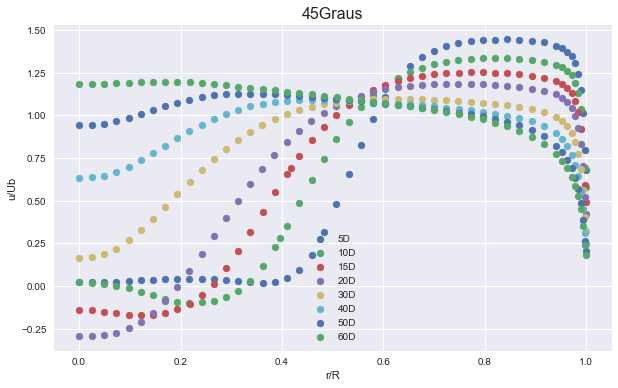

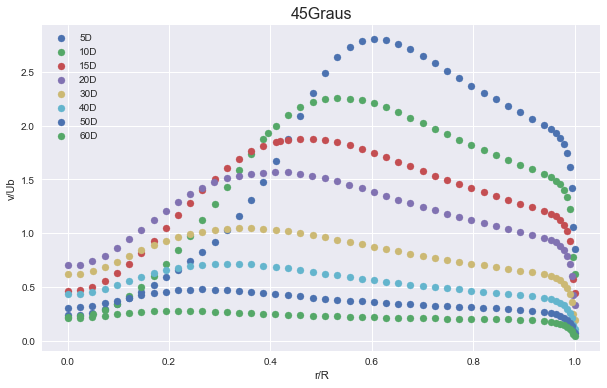

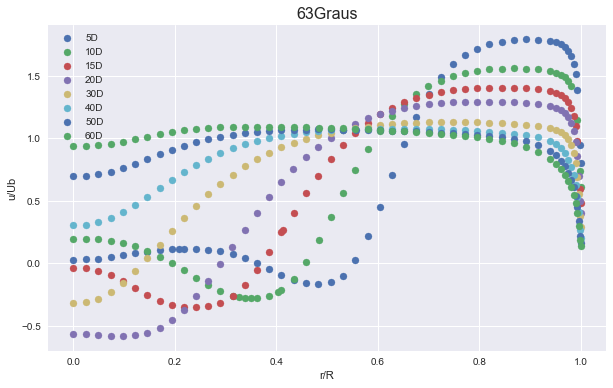

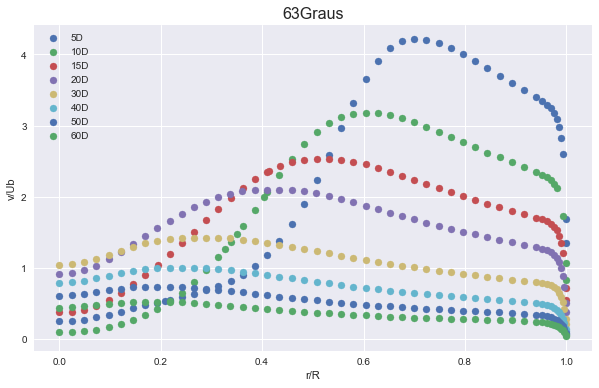

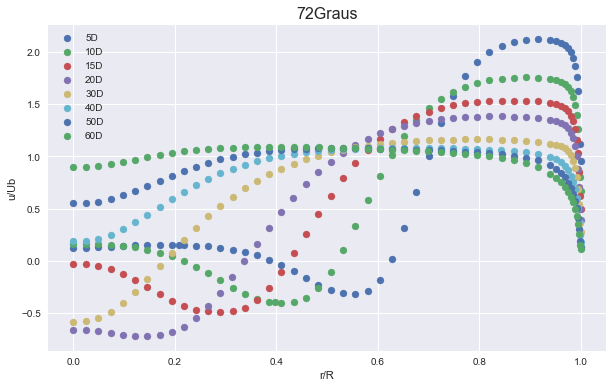

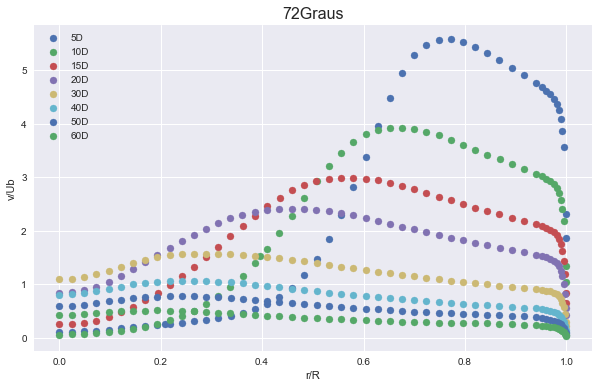

In [5]:
distances = [5,10,15,20,30,40,50,60]
R = 0.025
Ub = 1
for df,angle in zip(dfs, angles):
  plotVel(df, distances, 'axial')
  plt.title(''+ str(angle) +'Graus',  fontdict={'size': 16})
  plt.savefig('graficos/vel_axial_' + str(angle) + 'g.png')
  plotVel(df, distances, 'tang')
  plt.title(''+ str(angle) +'Graus',  fontdict={'size': 16})
  plt.savefig('graficos/vel_tang_' + str(angle) + 'g.png')

# Plotting swirl number 

In [6]:
def plotS(df, distances, angle):
  Sss = []
  for d in distances:
    Sss.append ( (2*np.pi*(np.trapz((df['dados_radial']['vel_axial_' + str(int(d)) + 'd']*df['dados_radial']['r_'+ str(int(d)) +'d']*df['dados_radial']['vel_tang_'+ str(int(d)) +'d']*df['dados_radial']['r_'+ str(int(d)) +'d']), df['dados_radial']['r_'+ str(int(d)) +'d'])))/(np.pi*(R**3)*(Ub**2)))
  S_tot = Sss #S_5d,S_10d,S_15d,S_20d,S_30d,S_40d,S_50d,S_60d
  x = distances

  #Gráfico Swirl Number
  plt.plot(x, S_tot,marker='o', label=angle)
  plt.xlabel("x/D")
  plt.ylabel("S")
  plt.grid(True)
  plt.legend(loc="best")
  plt.savefig('graficos/intensidade_giro.png')
  plt.show;

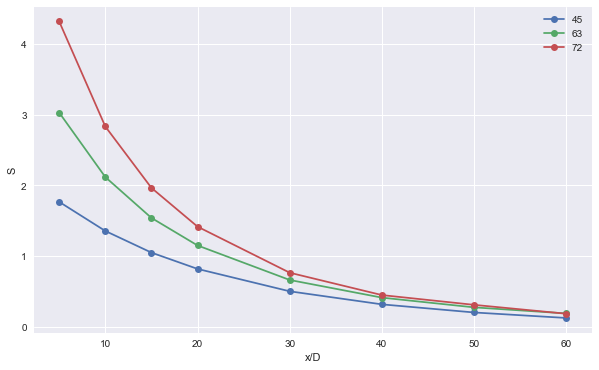

In [7]:
distances = [5,10,15,20,30,40,50,60]
R = 0.025
Ub = 1
plt.figure(figsize=(10, 6))
for df, angle in zip(dfs, angles):
  plotS(df, distances, angle)

## Plotting max. tangential velocity in each x/D

In [8]:
def plotVeltangmax(df, distances, angle):
  vtm = []
  for d in distances:
   vtm.append (df['dados_radial']['vel_tang_' + str(int(d)) + 'd'].max())
  a = vtm
  x = distances

  #Gráfico Swirl Number
  plt.plot(x, vtm,marker='o', label=angle)
  plt.xlabel("x/D")
  plt.ylabel("vmax")
  plt.grid(True)
  plt.legend(loc="best")
  plt.savefig('graficos/veltangmax_axis.png')
  plt.show;

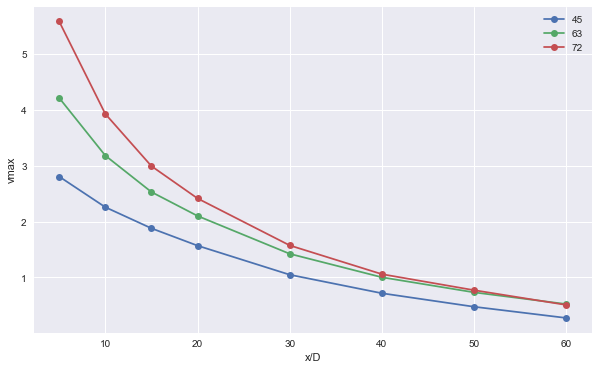

In [9]:
plt.figure(figsize=(10, 6))
for df, angle in zip(dfs, angles):
  plotVeltangmax(df, distances, angle)

## Plotting min. axial velocity in each x/D

In [10]:
def plotVelaxialmin(df, distances, angle):
  vtm = []
  for d in distances:
   vtm.append (df['dados_radial']['vel_axial_' + str(int(d)) + 'd'].min())
  a = vtm
  x = distances

  #Gráfico Swirl Number
  plt.plot(x, vtm,marker='o', label=angle)
  plt.xlabel("x/D")
  plt.ylabel("umin")
  plt.grid(True)
  plt.legend(loc="best")
  plt.savefig('graficos/velaxialmin_axis.png')
  plt.show;

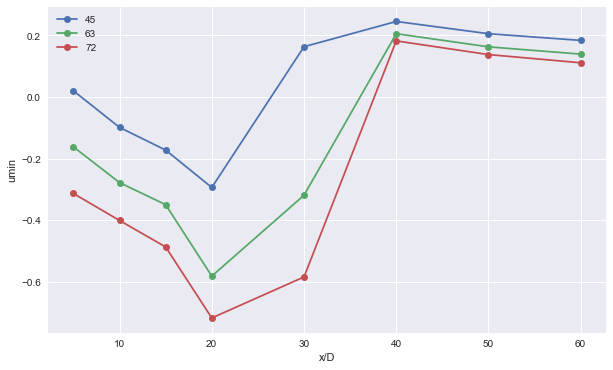

In [11]:
plt.figure(figsize=(10, 6))
for df, angle in zip(dfs, angles):
  plotVelaxialmin(df, distances, angle)

## Calculating the displacement of the max. tangential velocity in the radius

In [12]:
def velmax(df, distances, direction):
  plt.figure(figsize=(10, 6))
  #vtm = []
  #r_vtm = []
  for d in distances:
   #vtm.append (df['dados_radial']['vel_'+direction+'_' + str(int(d)) + 'd'].max())
   #r_vtm.append (df['dados_radial']['r_'+str(int(d))+'d'][df['dados_radial']['vel_'+direction+'_'+str(int(d))+'d'] == df['dados_radial']['vel_'+direction+'_'+str(int(d))+'d'].max() ])

   #a = vtm
   #x = r_vtm
   plt.scatter((df['dados_radial']['r_'+str(int(d))+'d'][df['dados_radial']['vel_'+direction+'_'+str(int(d))+'d'] == df['dados_radial']['vel_'+direction+'_'+str(int(d))+'d'].max() ].div(R)), df['dados_radial']['vel_'+direction+'_' + str(int(d)) + 'd'].max(), label=str(int(d))+'D')

  plt.xlabel("r/R")
  if direction == 'tang':
    plt.ylabel("vmax")
  elif direction == 'axial':
    plt.ylabel("umax")
  plt.grid(True)
  plt.legend(loc="best")   
  plt.show;

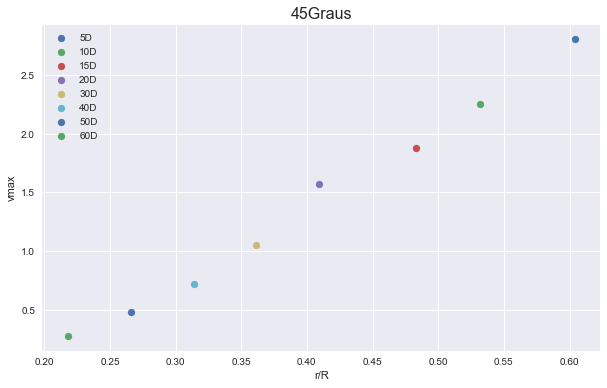

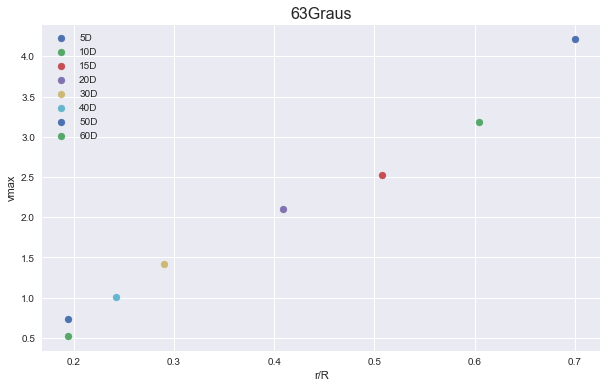

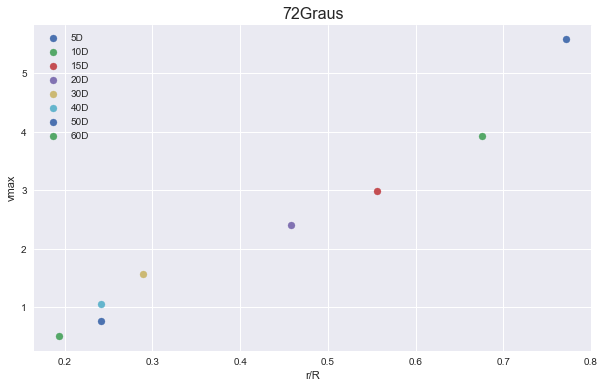

In [13]:
for df,angle in zip(dfs, angles):
  #velmax(df, distances, 'axial')
  #plt.title(''+ str(angle) +'Graus',  fontdict={'size': 16})
  #plt.savefig('graficos/vel_axial_' + str(angle) + 'g.png')
  velmax(df, distances, 'tang')
  plt.title(''+ str(angle) +'Graus',  fontdict={'size': 16})
  #plt.savefig('graficos/vel_tang_' + str(angle) + 'g.png')

## Calculating the axial vorticity

In [14]:
#vel = df['dados_radial']['vel_tang_'+str(int(d))+'d'] 
#velmax = df['dados_radial']['vel_tang_'+str(int(d))+'d'].max()
#raio = df['dados_radial']['r_'+str(int(d))+'d']
#raio_max = raio[vel == velmax]
#w_x.shape

In [17]:
#distances = [5,10,15,20,30,40,50,60]
distances=[20]
def vortaxial(df, distances):
  plt.figure(figsize=(10, 6))
  for d in distances:
        vel_tang = df['dados_radial']['vel_axial_'+str(int(d))+'d']
        r_d = df['dados_radial']['r_'+str(int(d))+'d']
        w_x=((1/r_d[1:])*np.diff(r_d*vel_tang))/(np.diff(r_d))
        plt.plot(r_d[1:].div(R),w_x,label=str(int(d))+'D')
        
  plt.xlabel("r/R")
  plt.ylabel("w x")
  plt.grid(True)
  plt.legend(loc="best")  
  plt.show;
        

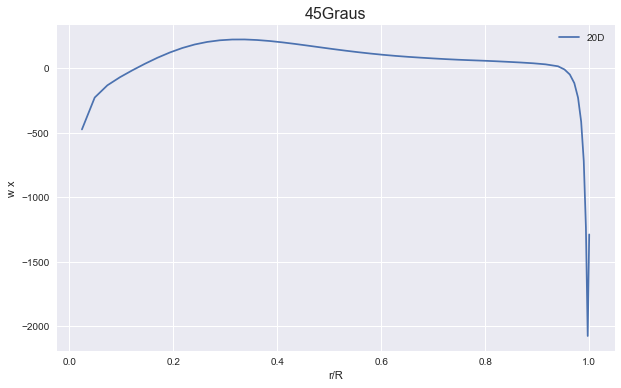

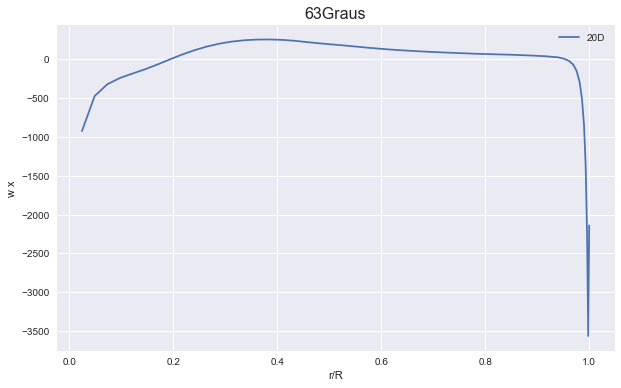

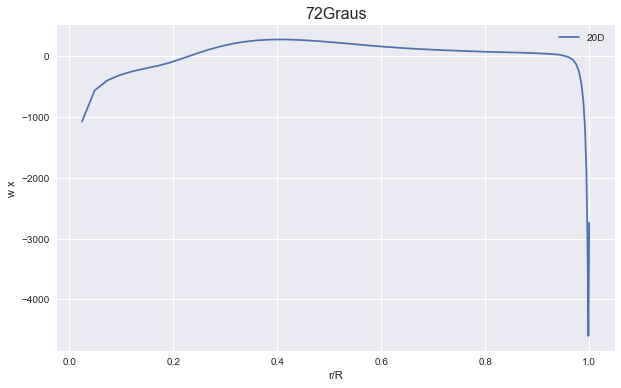

In [18]:
for df,angle in zip(dfs, angles):
  vortaxial(df, distances)
  plt.title(''+ str(angle) +'Graus',  fontdict={'size': 16})
  #w_x.to_csv('out '+ str(angle) +'graus.csv')

## Vorticity and components (Fluent)

In [19]:
def plotvort(df, distances, direction):
  # distances = [5,10,15,20,30,40,50,60]
  plt.figure(figsize=(10, 6))
  for d in distances:
    plt.plot(df['vorticidade']['r_' + str(int(d)) + 'd'].div(R), df['vorticidade']['vort_' + direction  + '_' + str(int(d)) +'d'], label=str(int(d))+'D')
    
  plt.xlabel("r/R")
  if direction == 'tang':
    plt.ylabel("w_theta")
  elif direction == 'radial':
    plt.ylabel("w_r")
  elif direction == 'mag':
    plt.ylabel("w_mag")
  elif direction == 'axial':
    plt.ylabel("w_axial")
  plt.grid(True)
  plt.legend(loc="best")   
  plt.show;

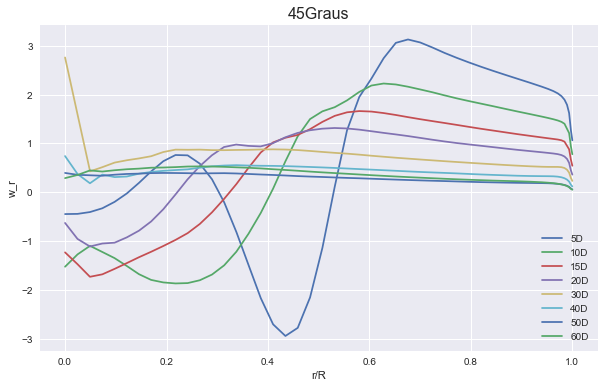

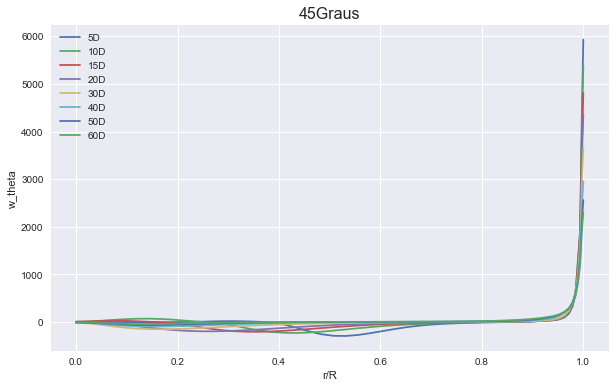

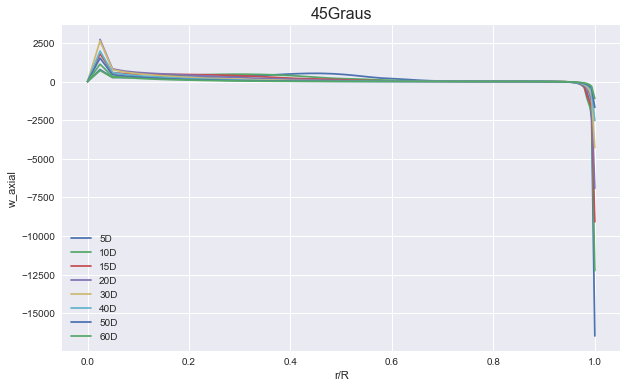

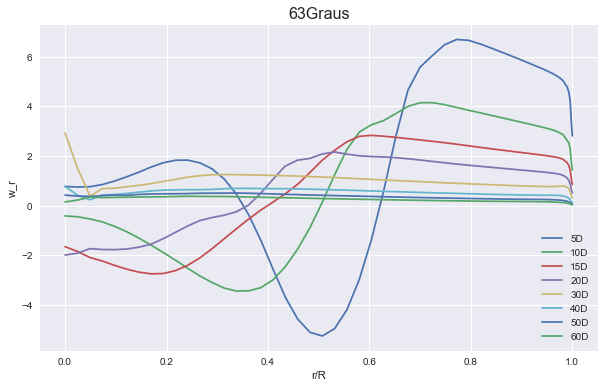

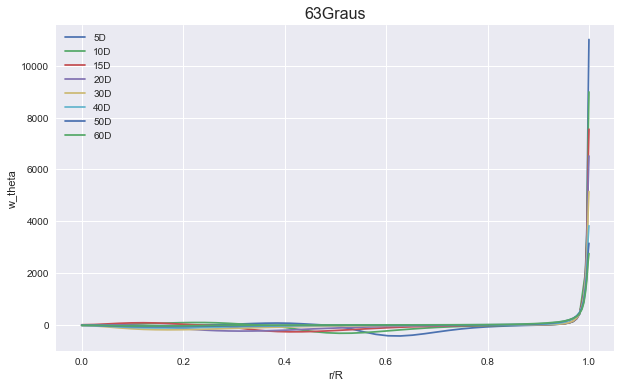

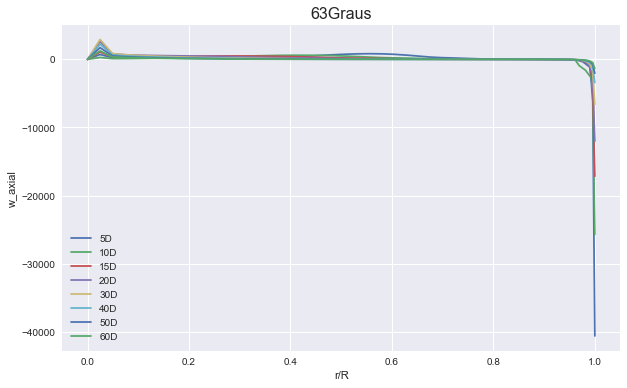

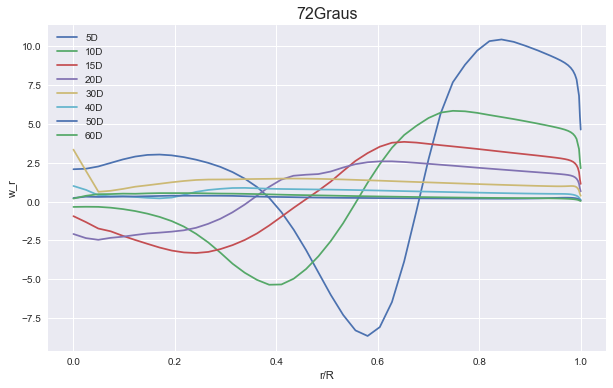

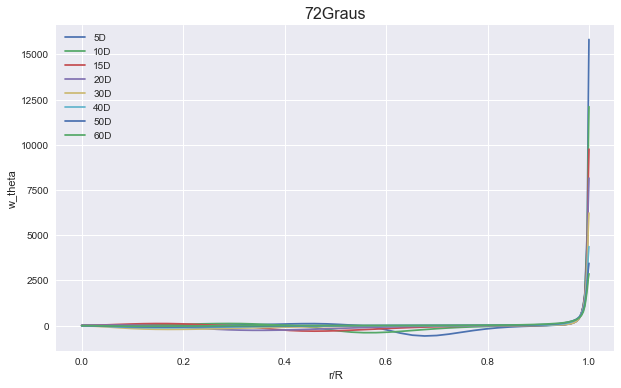

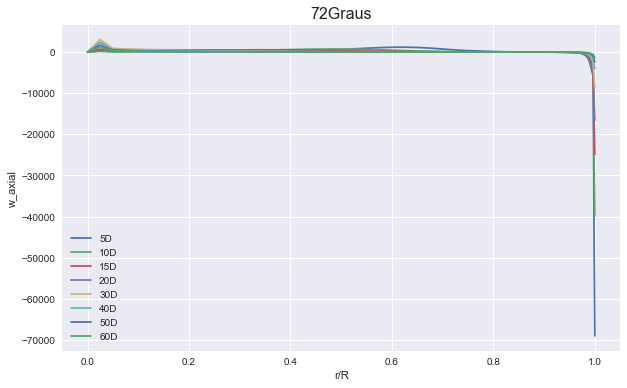

In [20]:
distances = [5,10,15,20,30,40,50,60]
R = 0.025
Ub = 1
for df,angle in zip(dfs, angles):
  plotvort(df, distances, 'radial')
  plt.title(''+ str(angle) +'Graus',  fontdict={'size': 16})
  #plt.savefig('graficos/vel_axial_' + str(angle) + 'g.png')
  plotvort(df, distances, 'tang')
  plt.title(''+ str(angle) +'Graus',  fontdict={'size': 16})
  #plt.savefig('graficos/vel_tang_' + str(angle) + 'g.png')
  plotvort(df, distances, 'axial')
  plt.title(''+ str(angle) +'Graus',  fontdict={'size': 16})
  #plt.savefig('graficos/vel_axial_' + str(angle) + 'g.png')
  plt.title(''+ str(angle) +'Graus',  fontdict={'size': 16})

## Axial vorticity

In [21]:
def plotvortcompaxial(df, distances, direction):
  # distances = [5,10,15,20,30,40,50,60]
  plt.figure(figsize=(10, 6))
  for d in distances:
    plt.scatter(df['vorticidade']['r_' + str(int(d)) + 'd'][1:], df['vorticidade']['vort_' + direction  + '_' + str(int(d)) +'d'][1:], label=str(int(d))+'D - fluent')
    vel_tang = df['dados_radial']['vel_tang_'+str(int(d))+'d']
    r_d = df['dados_radial']['r_'+str(int(d))+'d']
    w_x1=((1/r_d[:-1])*np.diff(r_d*vel_tang))/(np.diff(r_d))
    #plt.plot(r_d[:-1],w_x1,label=str(int(d))+'D - forma reduzida')
    w_x2=((1/r_d[:-1])*(vel_tang+(r_d[:-1]*np.diff(vel_tang)/np.diff(r_d))))
    plt.plot(r_d,w_x2,label=str(int(d))+'D - forma expandida numpy')
    
  plt.xlabel("r/R")
  plt.ylabel("w_axial")
  plt.grid(True)
  plt.legend(loc="best")   
  plt.show;

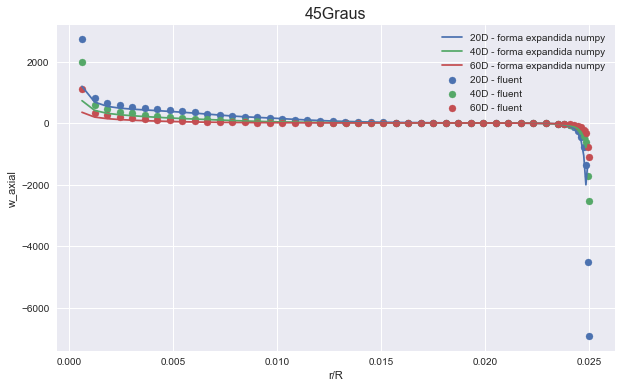

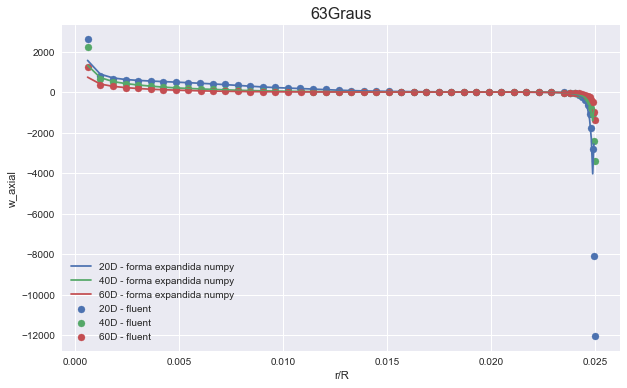

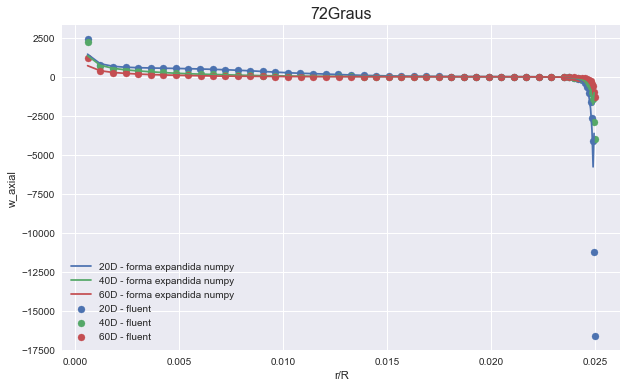

In [22]:
distances = [20,40,60]
R = 0.025
Ub = 1
for df,angle in zip(dfs, angles):
  plotvortcompaxial(df, distances, 'axial')
  plt.title(''+ str(angle) +'Graus',  fontdict={'size': 16})
  plt.savefig('graficos/vorticidade_axial_' + str(angle) + 'g.png')

## Turbulence properties

## Turbulent intensity

In [24]:
def plotTurbInt(df, distances):
  # distances = [5,10,15,20,30,40,50,60]
  plt.figure(figsize=(10, 6))
  for d in distances:
    plt.scatter(df['turbulencia']['r_' + str(int(d)) + 'd'].div(R), df['turbulencia']['turb_int_'+ str(int(d)) +'d'], label=str(int(d))+'D')
    
  plt.xlabel("r/R")
  plt.ylabel("Intensidade de turbulência")
  plt.grid(True)
  plt.legend(loc="best")   
  plt.show;

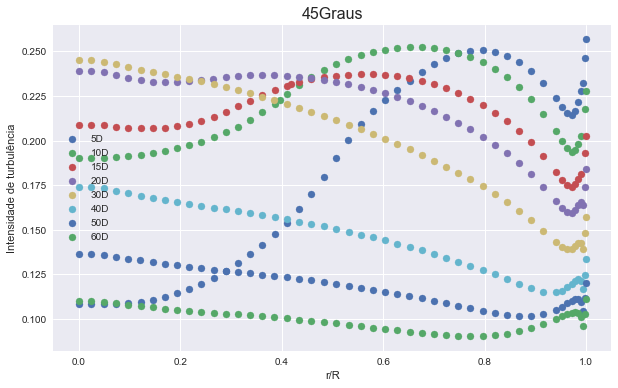

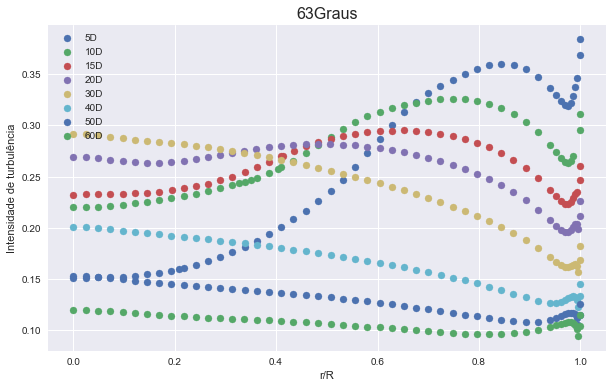

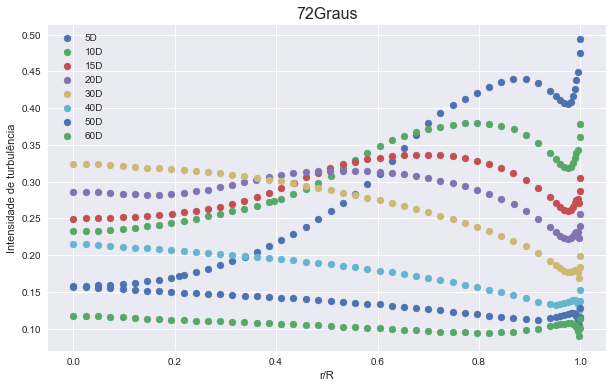

In [25]:
distances = [5,10,15,20,30,40,50,60]
for df,angle in zip(dfs, angles):
  plotTurbInt(df, distances)
  plt.title(''+ str(angle) +'Graus',  fontdict={'size': 16})

## Turbulent kinetic energy K

In [26]:
def plotTurbK(df, distances):
  # distances = [5,10,15,20,30,40,50,60]
  plt.figure(figsize=(10, 6))
  for d in distances:
    plt.scatter(df['turbulencia']['r_' + str(int(d)) + 'd'].div(R), df['turbulencia']['turb_k_'+ str(int(d)) +'d'], label=str(int(d))+'D')
    
  plt.xlabel("r/R")
  plt.ylabel("Intensidade cinética turbulenta")
  plt.grid(True)
  plt.legend(loc="best")   
  plt.show;

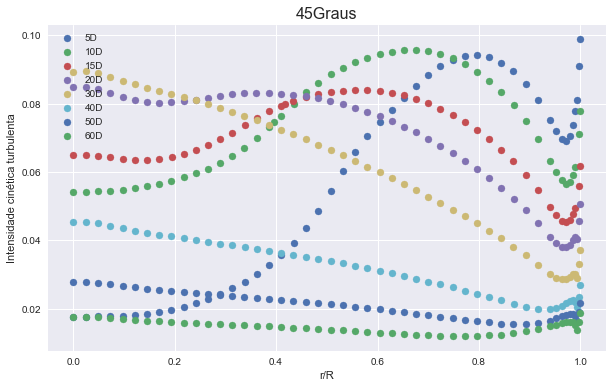

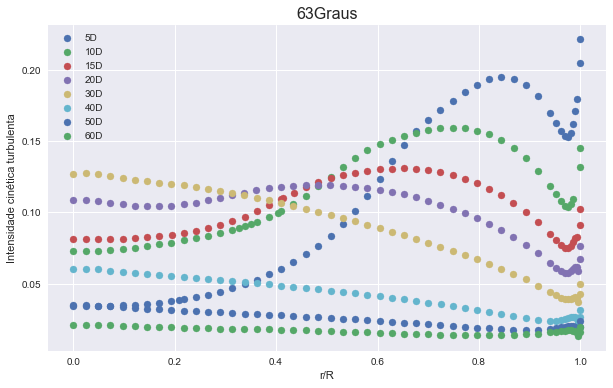

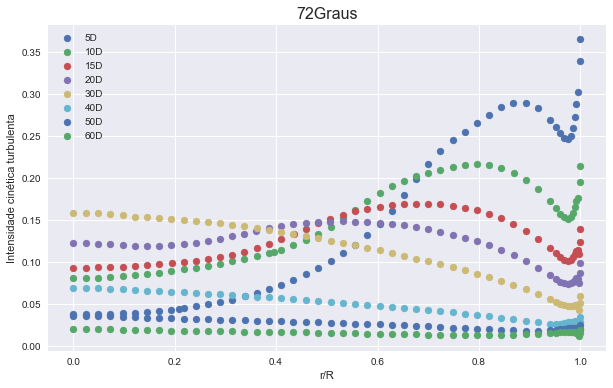

In [27]:
distances = [5,10,15,20,30,40,50,60]
for df,angle in zip(dfs, angles):
  plotTurbK(df, distances)
  plt.title(''+ str(angle) +'Graus',  fontdict={'size': 16})

## UV Reynolds Stress 

In [29]:
def plotUV(df, distances):
  # distances = [5,10,15,20,30,40,50,60]
  plt.figure(figsize=(10, 6))
  for d in distances:
    plt.scatter(df['turbulencia']['r_' + str(int(d)) + 'd'].div(R), df['turbulencia']['uv_rs_'+ str(int(d)) +'d'], label=str(int(d))+'D')
    
  plt.xlabel("r/R")
  plt.ylabel("UV")
  plt.grid(True)
  plt.legend(loc="best")   
  plt.show;

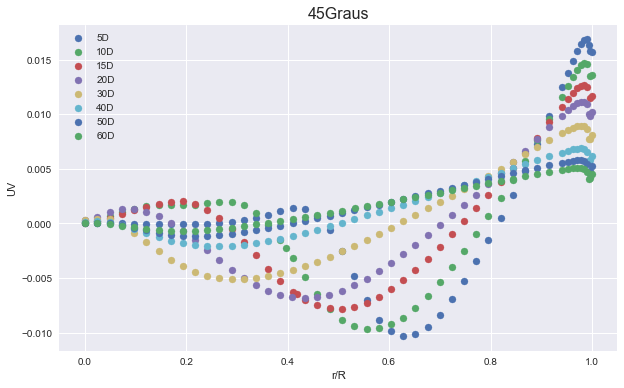

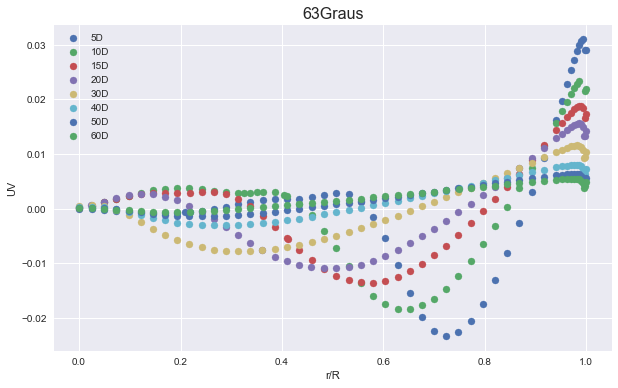

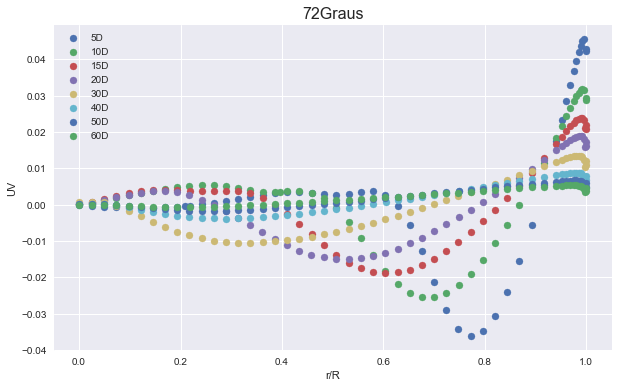

In [30]:
distances = [5,10,15,20,30,40,50,60]
for df,angle in zip(dfs, angles):
  plotUV(df, distances)
  plt.title(''+ str(angle) +'Graus',  fontdict={'size': 16})

## UW Reynolds Stress

In [31]:
def plotUW(df, distances):
  # distances = [5,10,15,20,30,40,50,60]
  plt.figure(figsize=(10, 6))
  for d in distances:
    plt.scatter(df['turbulencia']['r_' + str(int(d)) + 'd'].div(R), df['turbulencia']['uw_rs_'+ str(int(d)) +'d'], label=str(int(d))+'D')
    
  plt.xlabel("r/R")
  plt.ylabel("UW")
  plt.grid(True)
  plt.legend(loc="best")   
  plt.show;

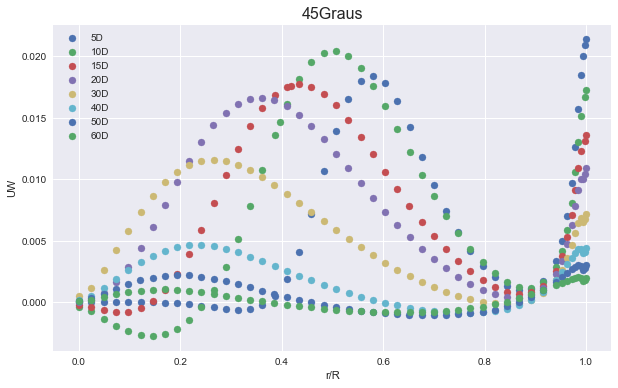

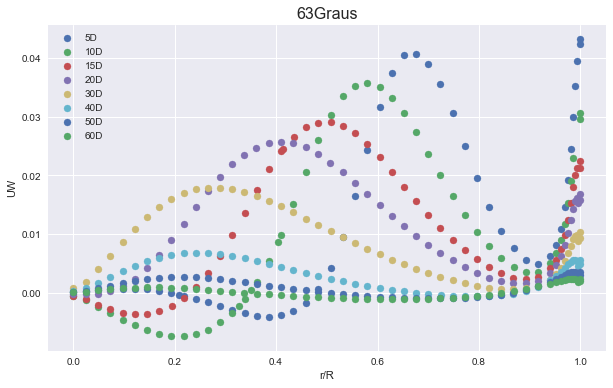

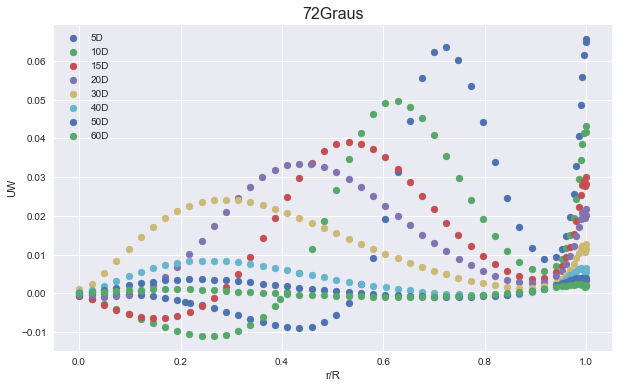

In [32]:
distances = [5,10,15,20,30,40,50,60]
for df,angle in zip(dfs, angles):
  plotUW(df, distances)
  plt.title(''+ str(angle) +'Graus',  fontdict={'size': 16})

## Axial velocity statistics at the centerline of the flow

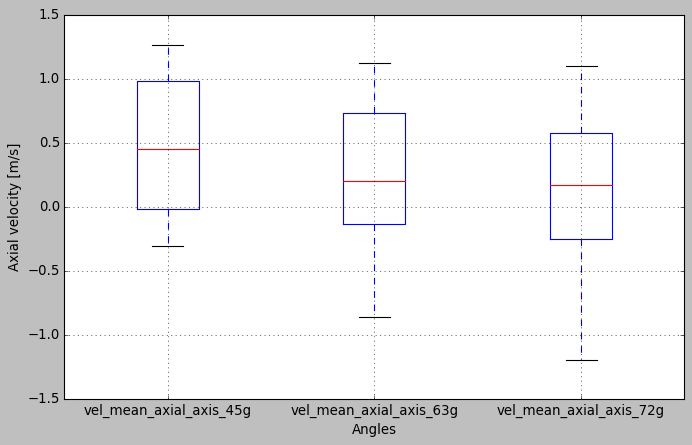

In [34]:
plt.figure(figsize=(10, 6))
df = pd.read_excel('resultados_45g.xlsx', sheet_name=['dados_radial','dados_wall','dados_axis','dados_wall_tail','vorticidade','turbulencia'])
num=df['dados_axis']
num.boxplot(column=['vel_mean_axial_axis_45g','vel_mean_axial_axis_63g','vel_mean_axial_axis_72g']);
plt.xlabel("Angles")
plt.ylabel("Axial velocity [m/s]")
plt.show;